# Medidas de dispersão

##### Embora as medidas de posição forneçam uma sumarização bastante importante dos dados, elas podem não ser suficientes para caracterizar conjuntos distintos, especialmente quando as observações de determinada distribuição apresentarem dados muito dispersos.

In [36]:
import pandas as pd
import numpy as np

In [2]:
dados = pd.read_excel("../Arquivos/dados.xlsx")
dados.head(3)

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1603807616
1,11,1,23,2,12,1150,1739789827
2,11,1,35,8,15,880,1760443822


### Criando um dataFrame para entendermos o problema

In [77]:
df = pd.DataFrame(data = {'Fulano': [8, 10, 4, 8, 6, 10, 8],
                          'Beltrano': [10, 2, 0.5, 1, 3, 9.5, 10],
                          'Sicrano': [7.5, 8, 7, 8, 8, 8.5, 7]},
                  index = ['Matemática',
                           'Português',
                           'Inglês',
                           'Geografia',
                           'História',
                           'Física',
                           'Química'])
df.rename_axis('Matérias', axis = 'columns', inplace = True)
df

Matérias,Fulano,Beltrano,Sicrano
Matemática,8,10.0,7.5
Português,10,2.0,8.0
Inglês,4,0.5,7.0
Geografia,8,1.0,8.0
História,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


### Se observarmos, dois alunos tem a mesma media, porem, situações bem diferentes

#### Enquanto o Beltrano tem notas bem dispersas, Sicrano tem notas bem constantes

#### Dessa forma, a media e nem mediana representando fielmente o que esta acontecendo

In [6]:
df.mean()

Matérias
Fulano      7.714286
Beltrano    5.142857
Sicrano     7.714286
dtype: float64

### Para entendermos essas questoes, temos as medidas de dispersão

# 1 . Desvio médio absoluto
***


### $$DM = \frac 1n\sum_{i=1}^{n}|X_i-\bar{X}|$$

##### É o desvio da media , existe formula mais simples

In [16]:
# Pegando as notas de fulano

notas_fulano = df[['Fulano']]
notas_fulano

Matérias,Fulano
Matemática,8
Português,10
Inglês,4
Geografia,8
História,6
Física,10
Química,8


In [22]:
# Pegando a media de fulano

nota_media_fulano = notas_fulano.mean()[0]
nota_media_fulano

7.714285714285714

In [17]:
# Calculando o desvio de fulano

notas_fulano['Desvio'] = notas_fulano['Fulano'] - nota_media_fulano
notas_fulano

C:\Users\leand\AppData\Local\Temp\ipykernel_7656\272627019.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  notas_fulano['Desvio'] = notas_fulano['Fulano'] - nota_media_fulano


Matérias,Fulano,Desvio
Matemática,8,0.285714
Português,10,2.285714
Inglês,4,-3.714286
Geografia,8,0.285714
História,6,-1.714286
Física,10,2.285714
Química,8,0.285714


In [19]:
# Calculando a soma do desvio de fulano
# Valor muito proximo de ZERO (-16)

notas_fulano['Desvio'].sum()

-8.881784197001252e-16

In [27]:
# Calculando o valor absoluto desta soma

notas_fulano['(Desvio)'] = notas_fulano['Desvio'].abs()
notas_fulano

Matérias,Fulano,Desvio,(Desvio)
Matemática,8,0.285714,0.285714
Português,10,2.285714,2.285714
Inglês,4,-3.714286,3.714286
Geografia,8,0.285714,0.285714
História,6,-1.714286,1.714286
Física,10,2.285714,2.285714
Química,8,0.285714,0.285714


### Representando graficamente o desvio da media

<Axes: >

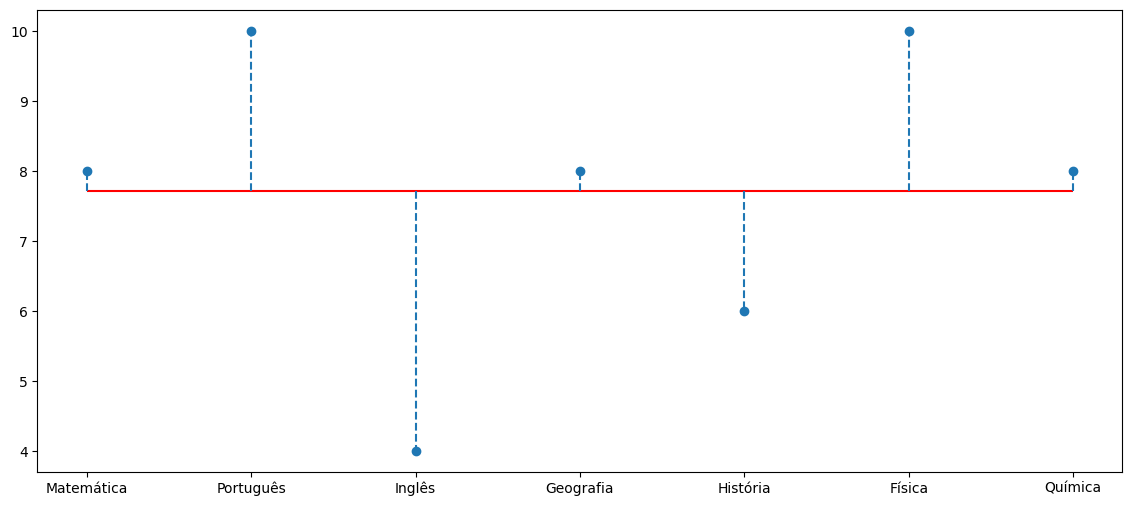

In [28]:
ax = notas_fulano['Fulano'].plot(style = 'o')
ax.figure.set_size_inches(14, 6)
ax.hlines(y = nota_media_fulano, xmin = 0, xmax = notas_fulano.shape[0] - 1, colors='red')
for i in range(notas_fulano.shape[0]):
    ax.vlines(x = i, ymin = nota_media_fulano, ymax = notas_fulano['Fulano'][i], linestyles='dashed')
ax

In [33]:
# Pegando a media de desvio
notas_fulano['(Desvio)'].mean()

1.5510204081632648

## Calculando o Desvio medio atraves da função ja pronta

In [ ]:
desvio_medio_absoluto = notas_fulano['Fulano'].mad()
desvio_medio_absoluto

# 2. Variancia

A variância é construída a partir das diferenças entre cada observação e a média dos dados, ou seja, o desvio em torno da média. Mas, diferente do desvio medio, a variancia considera sim a direção da diferença (Positiva ou negativa)

### Variância populacional

### $$\sigma^2 = \frac 1n\sum_{i=1}^{n}(X_i-\mu)^2$$

### Variância amostral

### $$S^2 = \frac 1{n-1}\sum_{i=1}^{n}(X_i-\bar{X})^2$$

In [68]:
# Elevando o desvio ao quadrado
notas_fulano['(Desvio)^2'] = notas_fulano['Desvio'].pow(2)
notas_fulano

Matérias,Fulano,Desvio,(Desvio),(Desvio)^2
Matemática,8,0.285714,0.285714,0.081633
Português,10,2.285714,2.285714,5.224490
Inglês,4,-3.714286,3.714286,13.795918
Geografia,8,0.285714,0.285714,0.081633
História,6,-1.714286,1.714286,2.938776
Física,10,2.285714,2.285714,5.224490
Química,8,0.285714,0.285714,0.081633


### Calculando a Variancia

In [71]:
# De acordo com a formula, tem que ser n - 1

notas_fulano['(Desvio)^2'].sum() / (len(notas_fulano) - 1)

4.57142857142857

### Calculando atraves da formula ja pronta

In [72]:
variancia = notas_fulano['Fulano'].var()
variancia

4.57142857142857

# 3.  Desvio padrão


### É a raiz da variancia

##### Uma das restrições da variância é o fato de fornecer medidas em quadrados das unidades originais - a variância de medidas de comprimento, por exemplo, é em unidades de área. Logo, o fato de as unidades serem diferentes dificulta a comparação da dispersão com as variáveis que a definem. Um modo de eliminar essa dificuldade é considerar sua raiz quadrada.

### Desvio padrão populacional

### $$\sigma = \sqrt{\frac 1n\sum_{i=1}^{n}(X_i-\mu)^2} \Longrightarrow \sigma = \sqrt{\sigma^2}$$

### Desvio padrão amostral

#### $$S = \sqrt{\frac 1{n-1}\sum_{i=1}^{n}(X_i-\bar{X})^2} \Longrightarrow S = \sqrt{S^2}$$

In [73]:
# Calculando a raiz da variancia

np.sqrt(variancia)

2.1380899352993947

In [89]:
# Calculando o desvio padrao com a formula pronta

desvio_padrao = notas_fulano['Fulano'].std()
desvio_padrao

2.1380899352993947

## Resumo e revisão

In [86]:
df

Matérias,Fulano,Beltrano,Sicrano
Matemática,8,10.0,7.5
Português,10,2.0,8.0
Inglês,4,0.5,7.0
Geografia,8,1.0,8.0
História,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


In [90]:
# Media 

df.mean()

Matérias
Fulano      7.714286
Beltrano    5.142857
Sicrano     7.714286
dtype: float64

In [91]:
# Mediana

df.median()

Matérias
Fulano      8.0
Beltrano    3.0
Sicrano     8.0
dtype: float64

In [92]:
# Moda 

df.mode()

Matérias,Fulano,Beltrano,Sicrano
0,8,10.0,8.0


In [94]:
# Desvio Padrao
# Apesar de Fulano e Beltrano terem medias e medianas bem proximas, o desvio padrao de Sicrano é bem menor, ele é constante
df.std()

Matérias
Fulano      2.138090
Beltrano    4.460141
Sicrano     0.566947
dtype: float64